# Document delivery

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "..." # enter file path

## File
dokmed-Statistik.csv: File created by our library containing orders for our document delivery sercice dokmed. Contains the following columns:
* Zeitschriftenartikel
* Bestellnummer
* DOI
* Zeitschrift
* Veröffentlichungsjahr
* Verlag,
* Lieferdienst

In [3]:
# Read data from csv-file
dokmed_all_df = pd.read_csv(f"{path}dokmed-Statistik.csv")
# Select only journal articles
dokmed_df = dokmed_all_df[dokmed_all_df.Zeitschriftenartikel == "ja"]

## Analyses

### Document Delivery Services used
All orders, i.e. including non journal articles

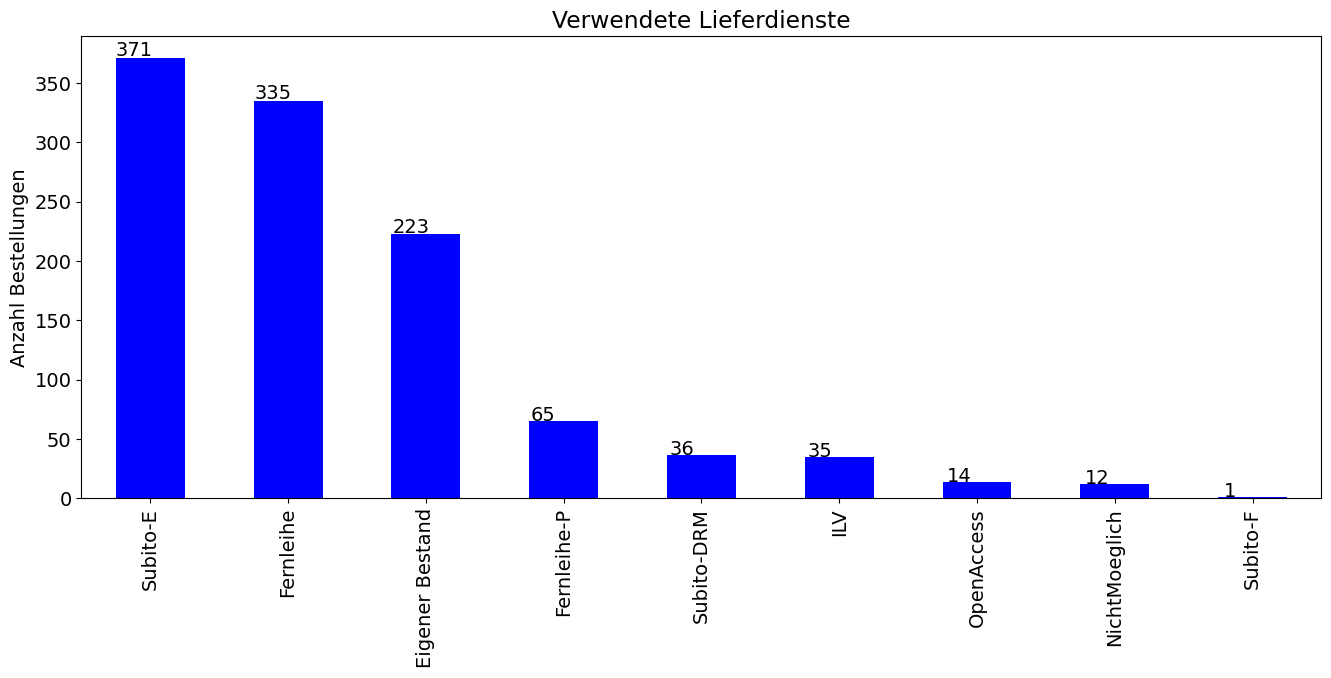

In [75]:
fig, ax = plt.subplots()
dokmed_all_df['Lieferdienst'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax, color='Blue')

plt.title('Verwendete Lieferdienste')
plt.ylabel('Anzahl Bestellungen')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=90, horizontalalignment="center")
plt.show()

### Select only articles, which were ordered via subito or (international) interlibrary loan

In [5]:
dokmed_bestellt = dokmed_df[(dokmed_df['Lieferdienst'] == 'Subito-E') | (dokmed_df['Lieferdienst'] == 'Subito-DRM') | (dokmed_df['Lieferdienst'] == 'Subito-F') | (dokmed_df['Lieferdienst'] == 'Fernleihe') | (dokmed_df['Lieferdienst'] == 'Fernleihe-P') | (dokmed_df['Lieferdienst'] == 'ILV')]

### Plot journal articles ordered by year of publication

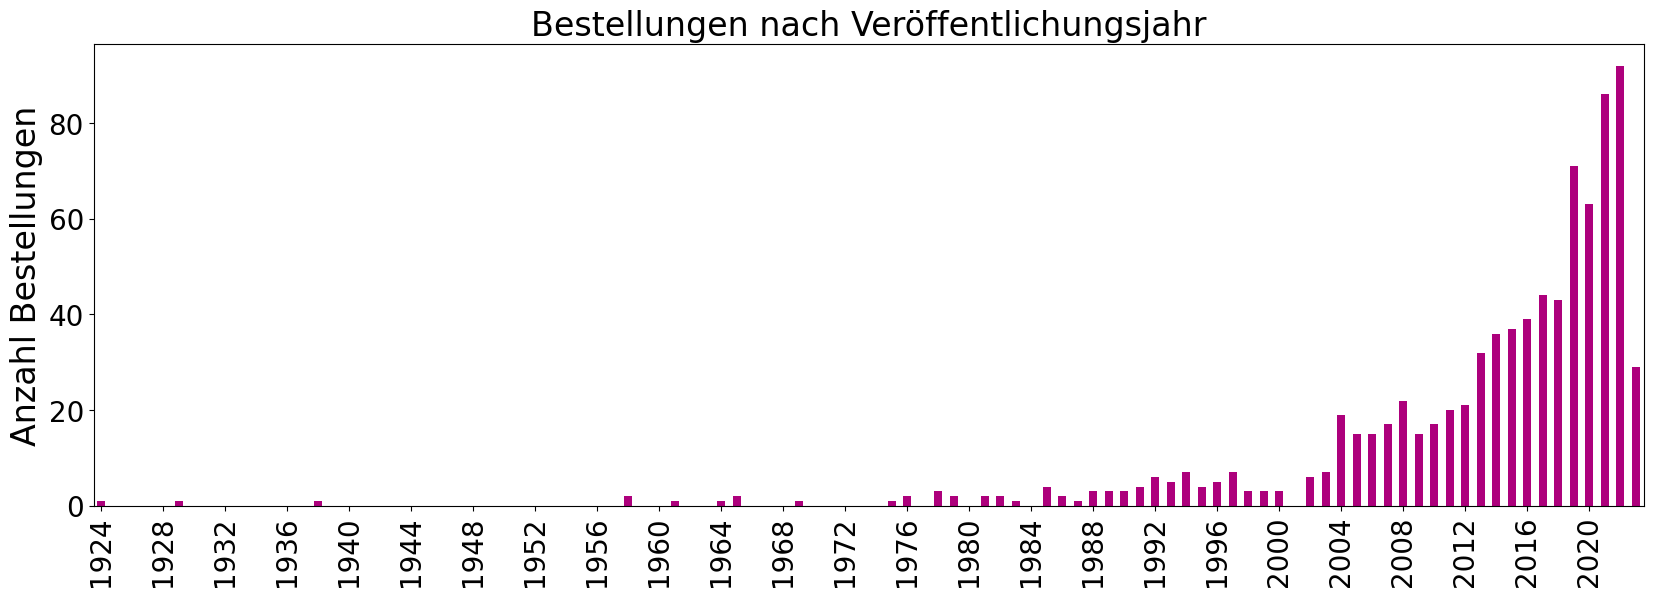

In [96]:
temp = dokmed_bestellt.groupby(['Veröffentlichungsjahr']).size()
temp.reindex(np.arange(int(temp.index.min()), int(temp.index.max())+1)).plot(kind='bar', color='#ad007c')
plt.title('Bestellungen nach Veröffentlichungsjahr', fontsize=24)
plt.ylabel('Anzahl Bestellungen', fontsize=24)
plt.xlabel('', fontsize=24)
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 20})
plt.locator_params(axis='x', nbins=25)
plt.savefig(f'{path}dokmed_Bestellungen_VeröffJahr.svg', dpi=100, bbox_inches='tight', format="svg")
plt.show()

### Plot journal articles ordered by publisher
Select only publishers, from which two or more journal articles were ordered

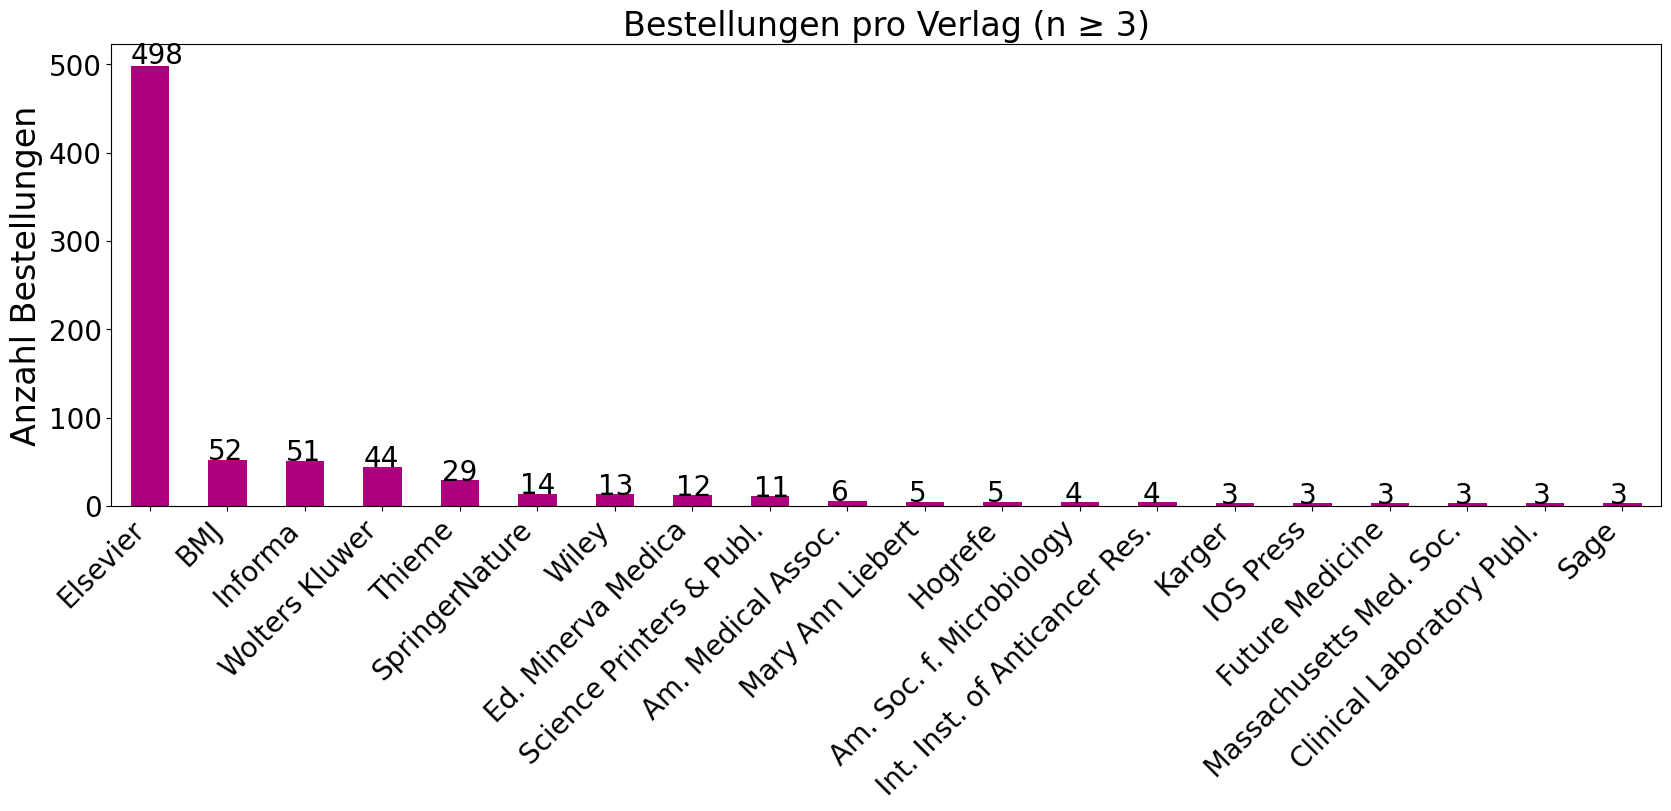

In [91]:
dokmed_Verlage = dokmed_bestellt.groupby(['Verlag']).filter(lambda x: len(x) > 2)
fig, ax = plt.subplots()

dokmed_Verlage['Verlag'].value_counts().plot(kind='bar', ax=ax, color='#ad007c')
plt.title('Bestellungen pro Verlag (n ≥ 3)', fontsize=24)
plt.ylabel('Anzahl Bestellungen', fontsize=24)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xticks(rotation=45, ha='right')
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 20})
plt.savefig(f'{path}dokmed_Bestellungen_Verlag.svg', dpi=100, bbox_inches='tight', format="svg")

plt.show()